Open the [LLMs Notebook](https://github.com/DeKUT-DSAIL/DSA-2024-NLP/blob/main/pre-lab/DSA_LLM_PreLab.ipynb) <a target="_blank" href="https://colab.research.google.com/github/DeKUT-DSAIL/DSA-2024-NLP/blob/main/pre-lab/DSA_LLM_PreLab.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>, **create a copy on your google drive to use for the lab** so that you can have our own copy and follow the steps as outlined in the notebook.

#LLM
A large language model (LLM) is a statistical language model, trained on a massive amount of data, that can be used to generate and translate text and other content, and perform other natural language processing (NLP) tasks.
LLMs are typically based on deep learning architectures, such as the Transformer developed by Google in 2017, and can be trained on billions of text and other content.[[1]](https://cloud.google.com/ai/llms)
Text-driven LLMs are used for a variety of natural language processing tasks, including text generation, machine translation, text summarization, question answering, and creating chatbots that can hold conversations with humans.

LLMs can also be trained on other types of data, including code, images, audio, video, and more. Google’s [Codey](https://cloud.google.com/vertex-ai/docs/generative-ai/code/code-models-overview), [Imagen](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview) and [Chirp](https://cloud.google.com/vertex-ai/docs/generative-ai/speech/speech-to-text) are examples of such models that will spawn new applications and help create solutions to the world’s most challenging problems.

LLMs are pre-trained on a massive amount of data. They are extremely flexible because they can be trained to perform a variety of tasks, such as text generation, summarization, and translation. They are also scalable because they can be fine-tuned to specific tasks, which can improve their performance.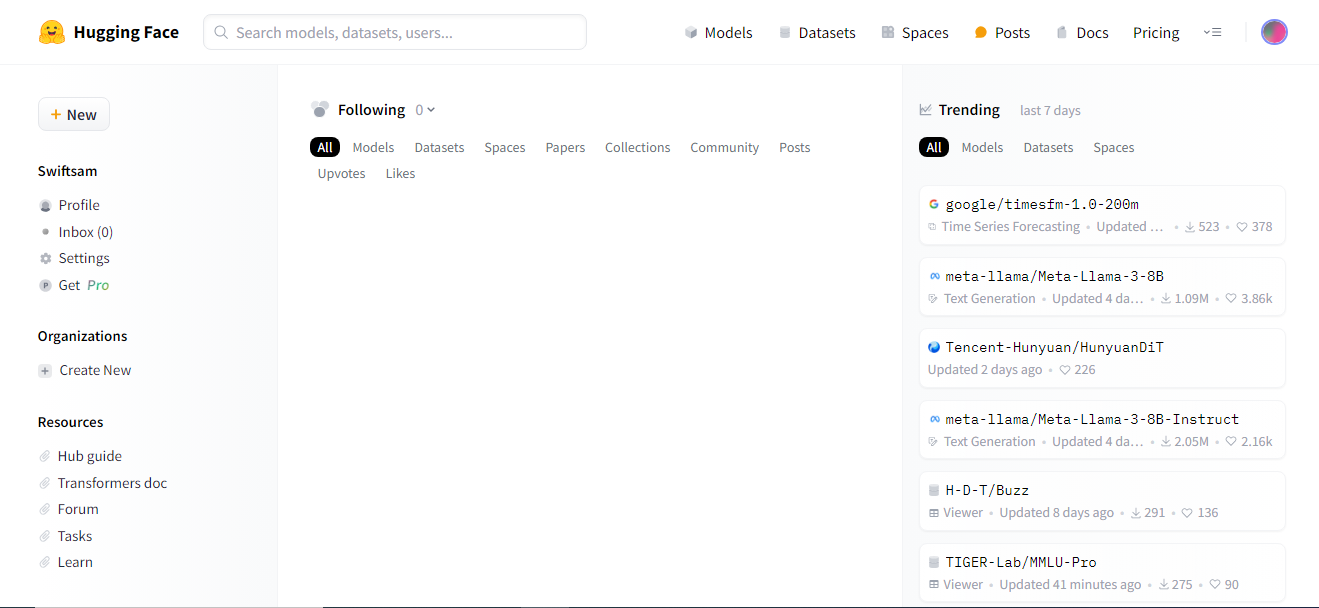

In this lab we are going to use colab with [huggingface](https://huggingface.co/) to achieve afew tasks with LLMs.

The figure above represents the interface for huggingface where you can access many pretrained models on Computervision,Reinforcement learning,Natural Language Processing(NLP) etc. In hugging face you can access various models datasets

We are going to deal with a few tasks concerned with LLMs which include:
Text Summarization

1.   Text Summarization
2.   Text Generation
3.   Question Answering

##Text Summarization
Text summarization is the process of creating a shorter version of a text document while still preserving the most important information. This can be useful for a variety of purposes, such as quickly skimming a long document, getting the gist of an article, or sharing a summary with others.
 We are going to use afew pre-Trained models from huggingface for text summarization.

 You can click on the link to acess the specific model used in huggingface and acess its description.

1.   [BART (Bidirectional and Autoregressive Transformer)](https://huggingface.co/suriya7/bart-finetuned-text-summarization)
2.   [BERTSUM (BERT mini Summarization Model)](https://huggingface.co/mrm8488/bert-mini2bert-mini-finetuned-cnn_daily_mail-summarization)
3.   [T5 by google AI](https://huggingface.co/pszemraj/long-t5-tglobal-base-16384-book-summary)







###BART (Bidirectional and Autoregressive Transformer)
Using BART (Bidirectional and Autoregressive Transformer) from Hugging face.It is a bart model which has been fine tuned for text summarization.

In [ ]:
#install a Python library called Transformers.Transformers is a popular library for working with natural language processing (NLP) models
!pip install transformers

AutoTokenizer: This class helps convert text into numerical representations that the model can understand. It automatically identifies the correct tokenizer based on the model you load.

AutoModelForSeq2SeqLM: This class represents a pre-trained sequence-to-sequence language model (Seq2SeqLM) suitable for tasks like summarization or translation. The AutoModelForSeq2SeqLM class automatically determines the specific model architecture based on the provided name.

tokenizer = AutoTokenizer.from_pretrained("suriya7/bart-finetuned-text-summarization"): This line creates a tokenizer object specifically designed for the pre-trained BART model ("bart-finetuned-text-summarization") uploaded by a user named suriya7 on Hugging Face.

model = AutoModelForSeq2SeqLM.from_pretrained("suriya7/bart-finetuned-text-summarization"): This line creates a model object based on the same pre-trained BART model for summarization

In [ ]:
#imports two classes from the Transformers library
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
#Loading Tokenizer
tokenizer = AutoTokenizer.from_pretrained("suriya7/bart-finetuned-text-summarization")
#Loading Model
model = AutoModelForSeq2SeqLM.from_pretrained("suriya7/bart-finetuned-text-summarization")

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/358 [00:00<?, ?B/s]

We are going to define a function called generate_summary that takes a text string as input and returns a summarized version of that text.



In [ ]:
def generate_summary(text):
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_new_tokens=100, do_sample=False)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

inputting the text to summarize

In [ ]:
#replace the text with text you may want to summarize
text_to_summarize = """Tesla was incorporated in July 2003 by Martin Eberhard and Marc Tarpenning as Tesla Motors. The company's name is a tribute to inventor and electrical engineer Nikola Tesla. In February 2004 Elon Musk joined as the company's largest shareholder and in 2008 he was named CEO. In 2008, the company began production of its first car model, the Roadster sports car, followed by the Model S sedan in 2012, the Model X SUV in 2015, the Model 3 sedan in 2017, the Model Y crossover in 2020, the Tesla Semi truck in 2022 and the Cybertruck pickup truck in 2023. The Model 3 is the all-time bestselling plug-in electric car worldwide, and in June 2021 became the first electric car to sell 1 million units globally.[6] In 2023, the Model Y was the best-selling vehicle, of any kind, globally.."""

The generate_summary function we defined will  process the text, generate a summary using theBART model, and return the summarized text.
The returned summary is then stored in the variable named summary


In [ ]:
summary = generate_summary(text_to_summarize)

In [ ]:
print(summary)

Tesla is an electric car and electric vehicle company based in Palo Alto, California, that was founded by Elon Musk in 2003. In June 2021, the Model 3 sedan became the first electric car to sell 1 million units globally, and the Model Y was the best-selling vehicle of any kind globally in 2023.


you can access the model description on the model and when you scroll down on the models page you will see how to use the specific model in python.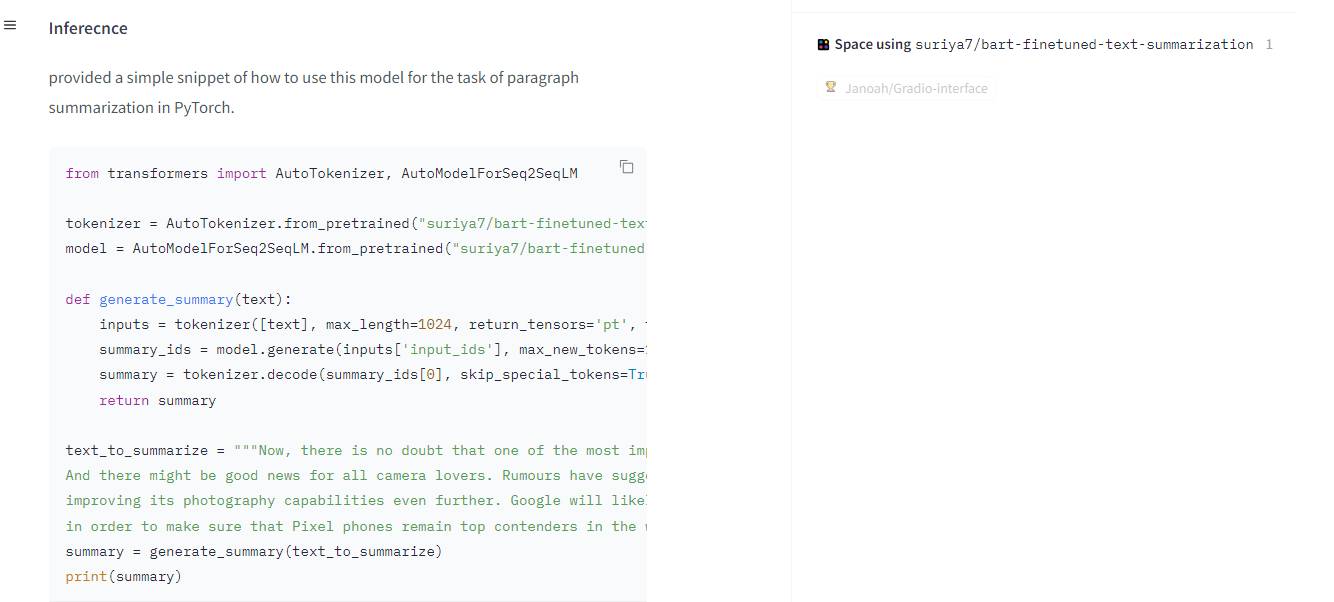



Let's now try out another model for text summarization in huggingface. Lets try using BERTSUM (BERT mini Summarization Model).Acess the model by clicking on the link below to access the model in huggingface. You will also acess an example usage for the model in the description.

[BERTSUM (BERT mini Summarization Model)](https://huggingface.co/mrm8488/bert-mini2bert-mini-finetuned-cnn_daily_mail-summarization)



In [ ]:
from transformers import BertTokenizerFast, EncoderDecoderModel
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizerFast.from_pretrained('mrm8488/bert-mini2bert-mini-finetuned-cnn_daily_mail-summarization')
model = EncoderDecoderModel.from_pretrained('mrm8488/bert-mini2bert-mini-finetuned-cnn_daily_mail-summarization').to(device)

tokenizer_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/3.63k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/93.7M [00:00<?, ?B/s]

In [ ]:
def generate_summary(text):
    # cut off at BERT max length 512
    inputs = tokenizer([text], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)

    output = model.generate(input_ids, attention_mask=attention_mask)

    return tokenizer.decode(output[0], skip_special_tokens=True)


In [ ]:
# You can use your ow text
text = "The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct"
generate_summary(text)

'the eiffel tower surpassed the washington monument to become the tallest man - made structure in paris. it was the first structure to reach a height of 300 metres ( 410 ft ) it is the second tallest free - standing structure in france after the millau viaduct was finished in 1930. it is now taller than the chrysler building by 5. 2 metres.'

In the LLM text summarization task above , you can use models from hugging face to achieve text summarisation.

###TO DO
Use other text summarization models from huggingface and run them in google colab to achieve text summary.
 Try and use the following model
 1.   [T5 by google AI fine-tuned on book summaries](https://huggingface.co/pszemraj/long-t5-tglobal-base-16384-book-summary) link to acess the model in huggingface

 Model: [pszemraj/long-t5-tglobal-base-16384-book-summary](https://huggingface.co/pszemraj/long-t5-tglobal-base-16384-book-summary)

 Experiment with as many models as possible but with a precaution of your computational resources as well as the credits you have in colab.If you are using the free tier it would be better to use small models so that you have a full experience in experimenting with them as colab just gives you just afew hours of usage for the T4 GPU.

Sample text you can use for the exercise

Data science is a multidisciplinary field that leverages various techniques and theories drawn from statistics, mathematics, computer science, and domain-specific knowledge to extract meaningful insights and knowledge from data. It has become an integral part of many industries, driving innovation and informed decision-making processes. The essence of data science lies in its ability to convert raw data into actionable intelligence, which is achieved through a blend of data manipulation, analysis, and visualization.

The process of data science begins with data collection, which involves gathering data from diverse sources such as databases, APIs, web scraping, and sensors. Once collected, the data often requires cleaning and preprocessing to handle missing values, remove duplicates, and correct inconsistencies. This step is crucial as the quality of data directly impacts the accuracy and reliability of the subsequent analysis.

Exploratory data analysis (EDA) is a key phase in the data science workflow. During EDA, data scientists use statistical tools and visualization techniques to understand the underlying patterns, trends, and relationships within the data. This step helps in formulating hypotheses and identifying potential areas for further investigation. Techniques such as scatter plots, histograms, and correlation matrices are commonly used to visualize data and draw preliminary conclusions.

Machine learning plays a pivotal role in data science by providing methods to build predictive models and automate decision-making processes. Machine learning algorithms can be broadly categorized into supervised and unsupervised learning. Supervised learning involves training models on labeled data, where the output is known, to make predictions on new, unseen data. Examples of supervised learning algorithms include linear regression, decision trees, and neural networks. Unsupervised learning, on the other hand, deals with unlabeled data and aims to discover hidden patterns or groupings within the data. Clustering and dimensionality reduction techniques like K-means and principal component analysis (PCA) are examples of unsupervised learning.

Data science also encompasses deep learning, a subset of machine learning that focuses on neural networks with many layers. Deep learning has achieved remarkable success in fields such as image and speech recognition, natural language processing, and autonomous driving. Convolutional neural networks (CNNs) and recurrent neural networks (RNNs) are popular architectures used in deep learning to handle spatial and temporal data, respectively.

Another critical aspect of data science is model evaluation and validation. It is essential to assess the performance of predictive models to ensure their accuracy and generalizability. Common evaluation metrics for regression tasks include mean squared error (MSE) and R-squared, while classification tasks often use accuracy, precision, recall, and F1-score. Cross-validation techniques, such as k-fold cross-validation, are employed to estimate the model's performance on unseen data and prevent overfitting.

Data visualization is an integral part of data science, as it allows for the communication of complex insights in an understandable and visually appealing manner. Tools like matplotlib, seaborn, and Plotly are frequently used to create interactive and informative visualizations. Effective data visualization not only aids in the interpretation of analysis results but also helps in communicating findings to stakeholders who may not have a technical background.

The deployment of data science solutions is the final step in the data science pipeline. This involves integrating predictive models and data analysis tools into production environments where they can be used to make real-time decisions. Deployment can be challenging as it requires considerations for scalability, reliability, and maintenance. Technologies such as cloud computing, containerization (e.g., Docker), and orchestration tools (e.g., Kubernetes) are commonly used to facilitate the deployment and management of data science applications.

Ethics and privacy are critical considerations in data science. The use of data, especially personal data, must adhere to ethical standards and regulatory requirements to protect individuals' privacy and rights. Data scientists must be aware of biases in data and models, ensuring that their analyses and predictions do not perpetuate or amplify existing biases. Transparency and accountability in data science practices are essential to maintain public trust and ensure fair outcomes.

The field of data science is continually evolving, driven by advancements in technology and the increasing availability of data. Emerging areas such as artificial intelligence (AI), the Internet of Things (IoT), and big data analytics are expanding the horizons of data science, offering new opportunities and challenges. As organizations strive to become more data-driven, the demand for skilled data scientists continues to grow, making it a dynamic and exciting field with vast potential for impact and innovation.

In conclusion, data science is a powerful discipline that combines expertise from various domains to transform data into valuable insights and solutions. Through data collection, preprocessing, analysis, machine learning, and deployment, data scientists enable organizations to make informed decisions and drive progress. As technology advances and the volume of data grows, the importance of data science will only increase, solidifying its role as a cornerstone of modern innovation and decision-making.

In [ ]:
#Your code here


In [ ]:
#@title The Solution

import torch
from transformers import pipeline

summarizer = pipeline(
    "summarization",
    "pszemraj/long-t5-tglobal-base-16384-book-summary",
    device=0 if torch.cuda.is_available() else -1,
)
long_text = """Data science is a multidisciplinary field that leverages various techniques and theories drawn from statistics, mathematics, computer science, and domain-specific knowledge to extract meaningful insights and knowledge from data. It has become an integral part of many industries, driving innovation and informed decision-making processes. The essence of data science lies in its ability to convert raw data into actionable intelligence, which is achieved through a blend of data manipulation, analysis, and visualization.

The process of data science begins with data collection, which involves gathering data from diverse sources such as databases, APIs, web scraping, and sensors. Once collected, the data often requires cleaning and preprocessing to handle missing values, remove duplicates, and correct inconsistencies. This step is crucial as the quality of data directly impacts the accuracy and reliability of the subsequent analysis.

Exploratory data analysis (EDA) is a key phase in the data science workflow. During EDA, data scientists use statistical tools and visualization techniques to understand the underlying patterns, trends, and relationships within the data. This step helps in formulating hypotheses and identifying potential areas for further investigation. Techniques such as scatter plots, histograms, and correlation matrices are commonly used to visualize data and draw preliminary conclusions.

Machine learning plays a pivotal role in data science by providing methods to build predictive models and automate decision-making processes. Machine learning algorithms can be broadly categorized into supervised and unsupervised learning. Supervised learning involves training models on labeled data, where the output is known, to make predictions on new, unseen data. Examples of supervised learning algorithms include linear regression, decision trees, and neural networks. Unsupervised learning, on the other hand, deals with unlabeled data and aims to discover hidden patterns or groupings within the data. Clustering and dimensionality reduction techniques like K-means and principal component analysis (PCA) are examples of unsupervised learning.

Data science also encompasses deep learning, a subset of machine learning that focuses on neural networks with many layers. Deep learning has achieved remarkable success in fields such as image and speech recognition, natural language processing, and autonomous driving. Convolutional neural networks (CNNs) and recurrent neural networks (RNNs) are popular architectures used in deep learning to handle spatial and temporal data, respectively.

Another critical aspect of data science is model evaluation and validation. It is essential to assess the performance of predictive models to ensure their accuracy and generalizability. Common evaluation metrics for regression tasks include mean squared error (MSE) and R-squared, while classification tasks often use accuracy, precision, recall, and F1-score. Cross-validation techniques, such as k-fold cross-validation, are employed to estimate the model's performance on unseen data and prevent overfitting.

Data visualization is an integral part of data science, as it allows for the communication of complex insights in an understandable and visually appealing manner. Tools like matplotlib, seaborn, and Plotly are frequently used to create interactive and informative visualizations. Effective data visualization not only aids in the interpretation of analysis results but also helps in communicating findings to stakeholders who may not have a technical background.

The deployment of data science solutions is the final step in the data science pipeline. This involves integrating predictive models and data analysis tools into production environments where they can be used to make real-time decisions. Deployment can be challenging as it requires considerations for scalability, reliability, and maintenance. Technologies such as cloud computing, containerization (e.g., Docker), and orchestration tools (e.g., Kubernetes) are commonly used to facilitate the deployment and management of data science applications.

Ethics and privacy are critical considerations in data science. The use of data, especially personal data, must adhere to ethical standards and regulatory requirements to protect individuals' privacy and rights. Data scientists must be aware of biases in data and models, ensuring that their analyses and predictions do not perpetuate or amplify existing biases. Transparency and accountability in data science practices are essential to maintain public trust and ensure fair outcomes.

The field of data science is continually evolving, driven by advancements in technology and the increasing availability of data. Emerging areas such as artificial intelligence (AI), the Internet of Things (IoT), and big data analytics are expanding the horizons of data science, offering new opportunities and challenges. As organizations strive to become more data-driven, the demand for skilled data scientists continues to grow, making it a dynamic and exciting field with vast potential for impact and innovation.

In conclusion, data science is a powerful discipline that combines expertise from various domains to transform data into valuable insights and solutions. Through data collection, preprocessing, analysis, machine learning, and deployment, data scientists enable organizations to make informed decisions and drive progress. As technology advances and the volume of data grows, the importance of data science will only increase, solidifying its role as a cornerstone of modern innovation and decision-making."""

result = summarizer(long_text)
print(result[0]["summary_text"])


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.36k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1006: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


This chapter discusses the various branches of the field of science, focusing on how to transform raw, unsupervised, or unlabelered data into actionably useful knowledge. The first step in the process is to gather, clean, and prepare the raw information. Next, machine learning is used to build prediction-based models and then to perform deep learning. Finally, it is important to understand how to use these tools to drive real-time business decisions.


#Text Generation

LLMs, or Large Language Models, are the key component behind text generation. In a nutshell, they consist of large pretrained transformer models trained to predict the next word (or, more precisely, token) given some input text. Since they predict one token at a time, you need to do something more elaborate to generate new sentences other than just calling the model — you need to do autoregressive generation.

Autoregressive generation is the inference-time procedure of iteratively calling a model with its own generated outputs, given a few initial inputs. In 🤗 Transformers, this is handled by the generate() method, which is available to all models with generative capabilities.

The ’transformers’ package by huggingface provides direct access to a multitude of pretrained large language models (LLMs). Models and easy-to-use pipelines for many common NLP-tasks exist, ranging from (causal or masked) language modeling over machine translation to sentiment analysis or natural language inference. This brief tutorial showcases how to download a pre-trained causal LLM, [roneneldan/TinyStories-1M](https://huggingface.co/roneneldan/TinyStories-1M), how to use it for text generation.

The Model trained on the TinyStories Dataset, see https://arxiv.org/abs/2305.07759

The following snippets show the model as present in huggingface as well as the example usage which we will implement and use the model to generate text.

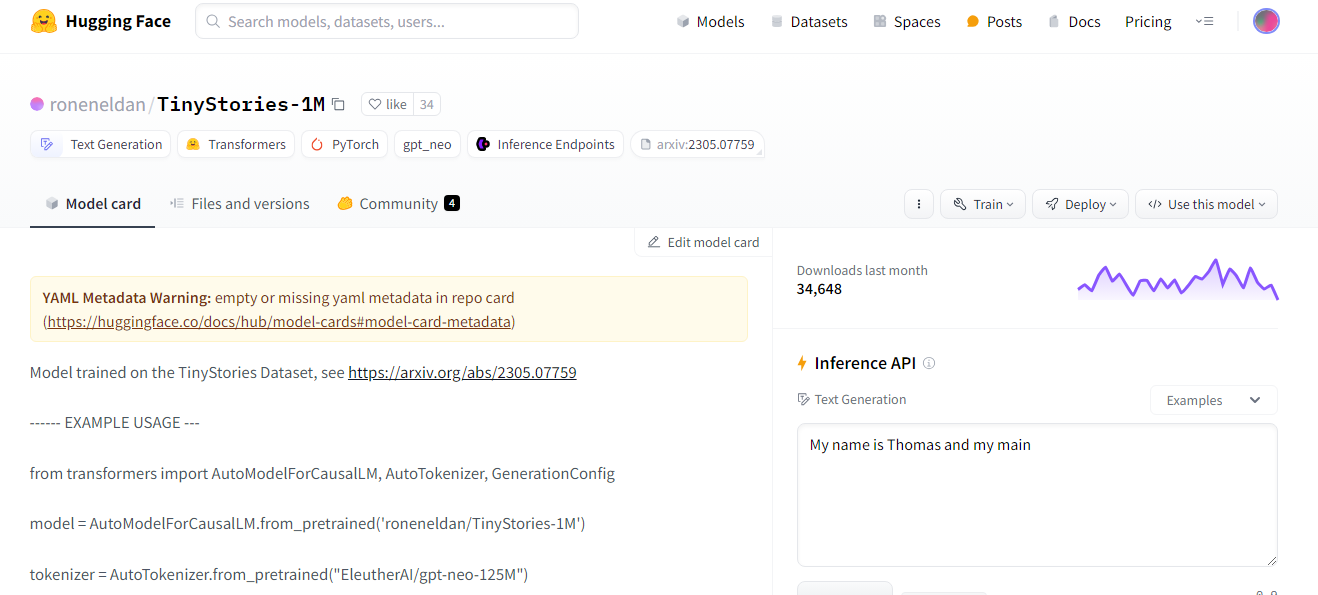

The model description and example usage

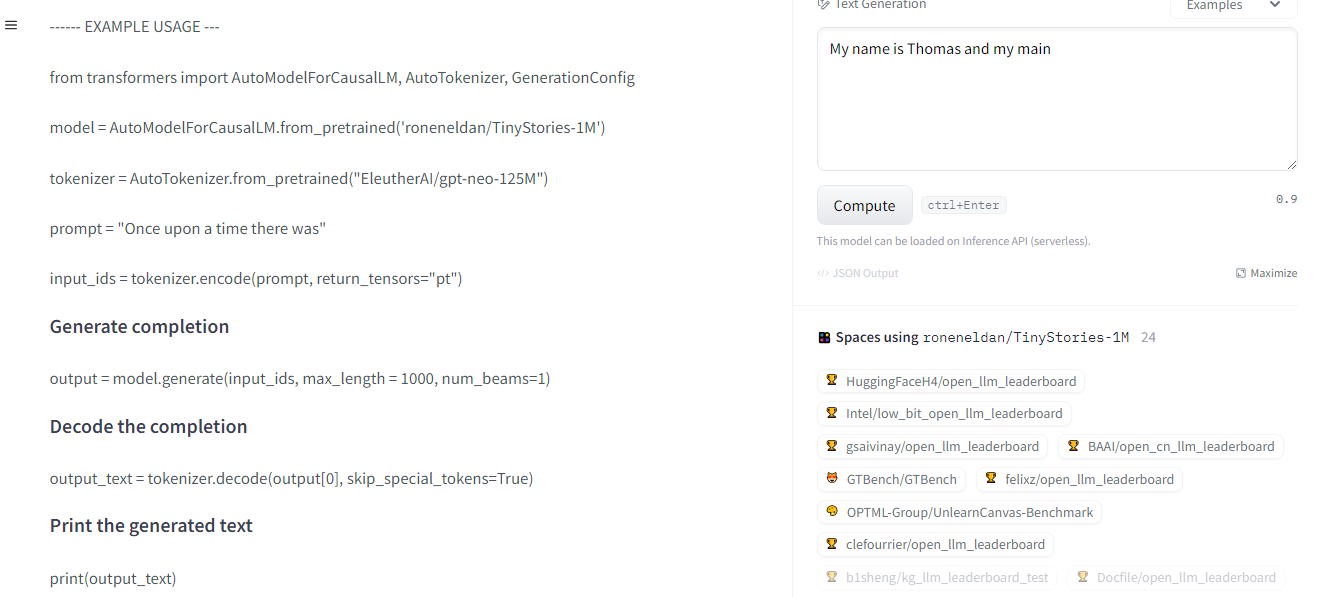

AutoModelForCausalLM: This class from the Hugging Face Transformers library is used to load pre-trained causal language models.


AutoTokenizer: This class is used to load the tokenizer corresponding to a pre-trained model.


GenerationConfig: This class can be used to configure the text generation process, though it is not used in this particular code snippet.


AutoModelForCausalLM.from_pretrained('roneneldan/TinyStories-1M'): This line loads a pre-trained causal language model named 'TinyStories-1M' from the Hugging Face Model Hub. The model was created by Ronen Eldan and is designed to generate story-like text.


AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M"): This line loads the tokenizer associated with the GPT-Neo 125M model developed by EleutherAI. The tokenizer is responsible for converting text into tokens that the model can process and vice versa.


tokenizer.encode(prompt, return_tensors="pt"): This line encodes the prompt text into token IDs using the tokenizer. The return_tensors="pt" argument specifies that the output should be in the form of PyTorch tensors, which are required for input into the model.



In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

model = AutoModelForCausalLM.from_pretrained('roneneldan/TinyStories-1M')

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")

#This line defines a string variable prompt which contains the initial text that will be used to generate further text
prompt = "Once upon a time there was"

#This variable now contains the token IDs for the prompt, encoded in a format suitable for input to the model.
input_ids = tokenizer.encode(prompt, return_tensors="pt")

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/48.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

###The additional line below of code generates text using the pre-trained model based on the provided prompt.

model.generate: This method is used to generate text from the model. It takes several arguments that control the generation process.

input_ids: This is the encoded input prompt that you prepared earlier. It's the starting text from which the model will continue generating text.

max_length=1000: This sets the maximum length of the generated text, including the input prompt. The generation process will stop once this length is reached. Here, it is set to 1000 tokens.

num_beams=1: This specifies the number of beams for beam search. Beam search is a method used in text generation to explore multiple possible sequences simultaneously and choose the best one. When num_beams is set to 1, it effectively means no beam search is used, and the generation process follows a greedy approach (choosing the most probable next token at each step).

In [ ]:
#This variable contains the model to generate text
output = model.generate(input_ids, max_length = 1000, num_beams=1)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
#this line of code decodes the generated token IDs back into a human-readable string, omitting any special tokens that may have been included in the token IDs
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

In [ ]:
#This line prints the generated text
print(output_text)

Once upon a time there was a little girl named Lily. She loved to play outside in the sunshine. One day, she saw a big, shiny rock in the sky. She wanted to touch it, but it was too high.

Lily's mommy told her that it was important to be careful and not touch things. Lily didn't want to touch it, so she asked her mommy if she could touch it. Her mommy said yes and they went to the park.

When they got there, Lily saw a big, scary dog. The dog was barking and barked loudly. Lily was scared and didn't know what to do. She tried to run away, but she was too fast. She tried to run away, but it was too late. The dog was too fast and it was too fast.

Lily was sad and cried. She wished she had listened to her mommy. She wished she had listened to her mommy and never let her to get back.



For our next example we are going to use another Text generation model in [huggingface](https://huggingface.co/).

The model: [Qwen/Qwen1.5-1.8B-Chat](https://huggingface.co/Qwen/Qwen1.5-1.8B-Chat)  . You can click on the link to acess it and see the model descriptions.In the description , there is also an example usage which includes some code to implement the model so that it generates text.

This installs the accelerate library, which helps in distributing computations across different devices like CPUs and GPUs.

Imports the necessary classes from the Hugging Face Transformers library. AutoModelForCausalLM is used for loading causal language models, and AutoTokenizer is used for tokenizing input text.

In [ ]:
!pip install accelerate

# Import necessary libraries
import accelerate
from transformers import AutoModelForCausalLM, AutoTokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

 Code snippet below Loads the pre-trained Qwen1.5-1.8B-Chat model and its corresponding tokenizer from the Hugging Face Model Hub.

In [ ]:
# Set the device
device = "cuda"

# Load the model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen1.5-1.8B-Chat",
    torch_dtype="auto",
)
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen1.5-1.8B-Chat")

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Defines the user's input prompt that you want the model to respond to

In [ ]:
# Set the prompt
prompt = "Give me a short introduction to large language model."

The code cell below Creates a list of messages to simulate a conversation. The system message sets the role of the assistant, and the user message contains the prompt

In [ ]:
# Create the messages
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt},
]

The code cell below showsa function, this function formats the messages using a chat template suitable for the model. The tokenize=False parameter indicates that tokenization will be done later, and add_generation_prompt=True adds necessary tokens for text generation.



In [ ]:
# Apply the chat template
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)

The code cell below shows how to move the loaded model to the GPU for faster computation.



In [ ]:
# Move the model to the GPU
model.to(device)

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 2048)
    (layers): ModuleList(
      (0-23): 24 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (k_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (v_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=2048, out_features=5504, bias=False)
          (up_proj): Linear(in_features=2048, out_features=5504, bias=False)
          (down_proj): Linear(in_features=5504, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm()
        (post_attention_layernorm): Qwen2RMSNorm()
      )
    )
    (norm): Qwen2RMSNorm()
  )
  (lm_head): Line

Then the code below tokenizes the input text and converts it into tensors. The return_tensors="pt" parameter ensures the output is in PyTorch tensor format. The to(device) method moves the tokenized inputs to the GPU.

In [ ]:
# Tokenize the text
model_inputs = tokenizer([text], return_tensors="pt").to(device)

The code cell below generates text using the model. The max_new_tokens=512 parameter specifies the maximum number of tokens to be generated.

In [ ]:
# Generate the text
generated_ids = model.generate(
    model_inputs.input_ids,
    max_new_tokens=512,
)

The code cell below,processes the generated IDs to remove the input prompt tokens, leaving only the newly generated tokens. This is done by slicing off the length of the input IDs from the output IDs.

tokenizer.batch_decode(generated_ids, skip_special_tokens=True): This method takes the list of generated token IDs and converts them back into human-readable text.

The skip_special_tokens=True parameter ensures that any special tokens used by the model for formatting or control purposes are omitted from the final output.

[0]: Since batch_decode returns a list of decoded strings (one for each input in the batch), [0] is used to select the first (and in this case, only) item from the list.


In [ ]:
# Decode the generated IDs
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]

response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [ ]:
#Printing the response
print( response )

A large language model, also known as an NLP (Natural Language Processing) model, is a type of artificial intelligence system that uses deep learning algorithms to process and generate human-like text or speech. These models are designed to simulate the ability of humans to understand, generate, and interpret natural language, and they have become increasingly popular in recent years for a variety of applications.

At their core, large language models use neural networks to analyze and extract patterns from vast amounts of text data, such as books, articles, news articles, social media posts, and other sources. The model then uses this analysis to learn the structure and meaning of language, including grammar rules, syntax, and semantics, and to generate coherent and contextually relevant sentences or paragraphs based on input inputs.

One of the key advantages of large language models is their ability to handle a wide range of natural language tasks, including text summarization, ques

##To Do
Use the folowing model and use it for Text generation
You can access the model in huggingface using the following link which is also the specific model to use for this exercise.

Model : [google/gemma-1.1-2b-it](https://huggingface.co/google/gemma-1.1-2b-it)

Accessing the model in huggingface
[Model link ](https://huggingface.co/google/gemma-1.1-2b-it)

The model is a gated one so you have to to be granted access , follow the steps on the models page in huggingface to be granted access. Once granted access,make sure to refresh your notebook so that the code runs perfectly.


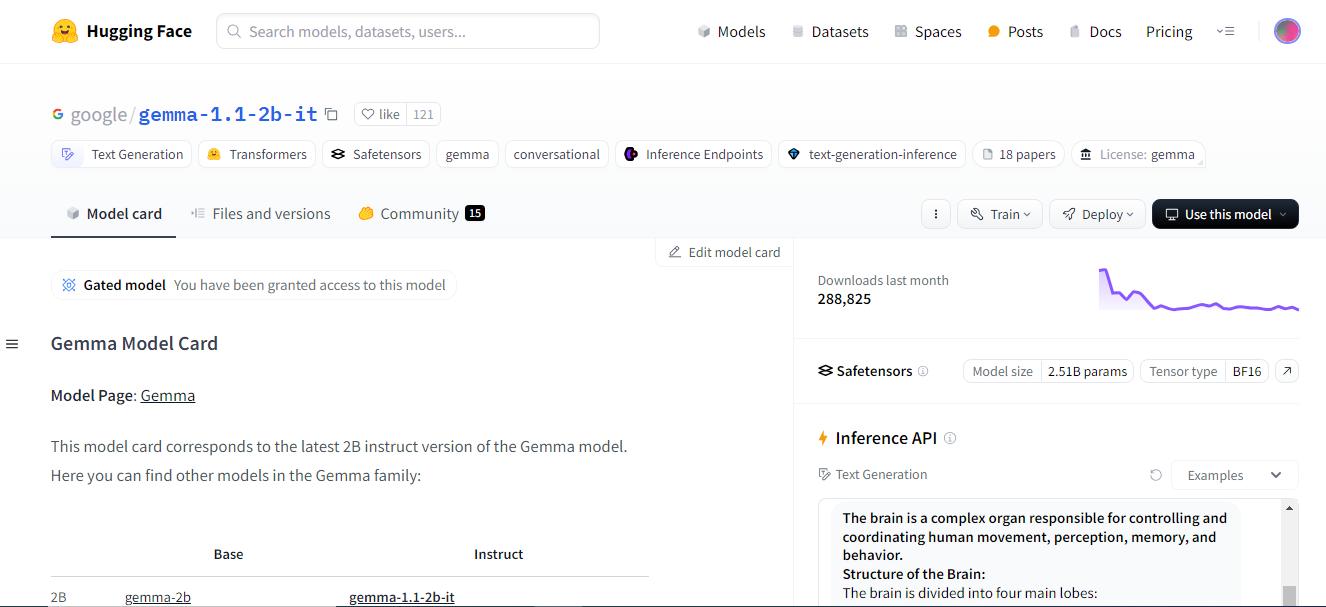

In [ ]:
#your code here


In [ ]:
#@title The solution
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("google/gemma-1.1-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-1.1-2b-it",
    torch_dtype=torch.bfloat16
)

input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(input_text, return_tensors="pt")

outputs = model.generate(**input_ids, max_new_tokens=50)
print(tokenizer.decode(outputs[0]))


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

<bos>Write me a poem about Machine Learning.

In circuits of code, a mind takes form,
A tapestry of algorithms, a digital storm.
Through layers of computation, data takes flight,
Learning patterns, insights in the night.

From images that speak, to algorithms that bind
